# ***Download dataset from Kaggle***


In [ ]:
!pip install opendatasets

In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/andonians/random-linear-regression")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: chamindumunasinghe
Your Kaggle Key: ··········


100%|██████████| 7.63k/7.63k [00:00<00:00, 4.24MB/s]

In [ ]:

data = pd.read_csv("random-linear-regression/test.csv")

# Data Preprocessing

In [ ]:
data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [ ]:
data.shape

(300, 2)

In [ ]:
X = data['x']
Y = data['y']

In [ ]:
X

0      77
1      21
2      22
3      20
4      36
       ..
295    71
296    46
297    55
298    62
299    47
Name: x, Length: 300, dtype: int64

In [ ]:
Y

0      79.775152
1      23.177279
2      25.609262
3      17.857388
4      41.849864
         ...    
295    68.545888
296    47.334876
297    54.090637
298    63.297171
299    52.459467
Name: y, Length: 300, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

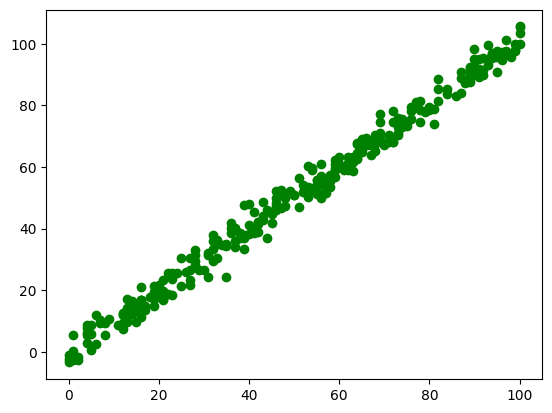

In [ ]:
plt.scatter(X,Y, c='g')
plt.show

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [ ]:

x_train.shape, x_test.shape

((240,), (60,))

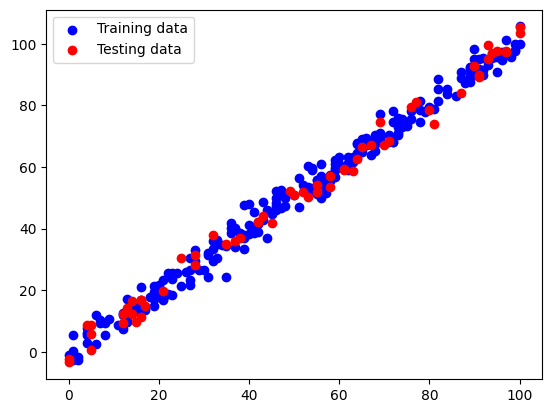

In [ ]:
plt.scatter(x_train, y_train, c='b', label='Training data')
plt.scatter(x_test, y_test, c='r', label='Testing data')
plt.legend()
plt.show()

# Model Building


In [ ]:
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4,input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics = ["mae"])

# train the model
epoch_number = 4
history = model.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=epoch_number)

Epoch 1/4
8/8 [==============================] - 1s 3ms/step - loss: 35.8583 - mae: 35.8583
Epoch 2/4
8/8 [==============================] - 0s 3ms/step - loss: 16.6129 - mae: 16.6129
Epoch 3/4
8/8 [==============================] - 0s 2ms/step - loss: 5.0308 - mae: 5.0308
Epoch 4/4
8/8 [==============================] - 0s 3ms/step - loss: 5.3911 - mae: 5.3911


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4)                 8         
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
y_predictions = model.predict(x_test)
y_predictions[:5]

2/2 [==============================] - 0s 11ms/step


array([[88.8863   ],
       [75.14668  ],
       [92.81191  ],
       [ 5.4671926],
       [89.86771  ]], dtype=float32)

In [ ]:
y_test.head(5)

203    92.887723
266    79.503415
152    97.001484
9       8.746748
233    89.739520
Name: y, dtype: float64

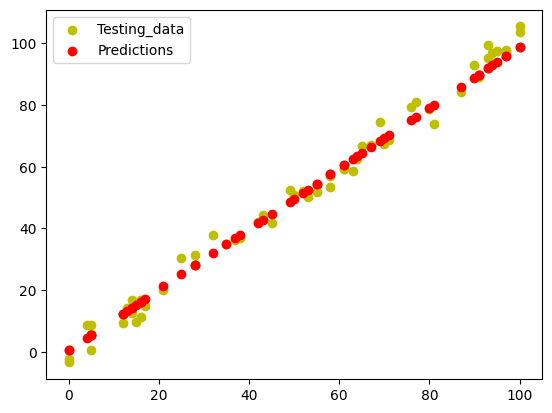

In [ ]:
#plt.scatter(x_train, y_train, c='b', label='Training_data')
plt.scatter(x_test, y_test, c='y', label='Testing_data')
plt.scatter(x_test, y_predictions, c='r', label='Predictions')
plt.legend()
plt.show()

In [ ]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 8ms/step - loss: 2.5897 - mae: 2.5897


[2.5896530151367188, 2.5896530151367188]